In [1]:
import numpy as np
import qiskit.quantum_info as qi
import matplotlib.pyplot as plt
from scipy.linalg import expm

In [2]:
def dagger(x):
    return np.transpose(x.conjugate())

# def mkExp_U(N,epsilon,A):
#     return np.identity(N)+1j*epsilon*A-epsilon**(2)*A**(2)-(1j/6)*epsilon**(3)*A**(3)-(1/24)*epsilon**(4)*A**(4)+(1j/120)*epsilon**(5)*A**(5)

def unitarity_diff(U):
    diff=U@dagger(U)-np.identity(N)
    return np.linalg.norm(diff)

def target_diff(U,U_target):
    return np.linalg.norm(U-U_target)

def mkFid(U_list,n_fid_sample,ind=[0,0]):
    fid=[]
    for i in range(n_fid_sample):
        for j in np.arange(i+1,n_fid_sample,1):
            UU=U_list[i]@dagger(U_list[j])
            fid.append(abs(UU[ind[0]][ind[1]])**2)
            
    fid=np.array(fid)
    return fid

In [43]:
N = 2
epsilon_max = 0.5
U=qi.random_unitary(N).to_matrix()

N_Haar=1000
N_Haar_max=int(2e7)
Haar_list=[]
target_diff_haar_list=[]
for i in range(N_Haar_max):
    U_tmp=qi.random_unitary(N).to_matrix()
    t_diff=target_diff(U_tmp,U)
    if t_diff<epsilon_max:
        Haar_list.append(U_tmp)
        target_diff_haar_list.append(t_diff)
        if len(Haar_list)%10==0:
            print(len(Haar_list))

    if len(Haar_list)==N_Haar:
        break
        
Haar_list=np.array(Haar_list)
print(Haar_list.shape)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
(1000, 2, 2)


<Figure size 432x288 with 0 Axes>

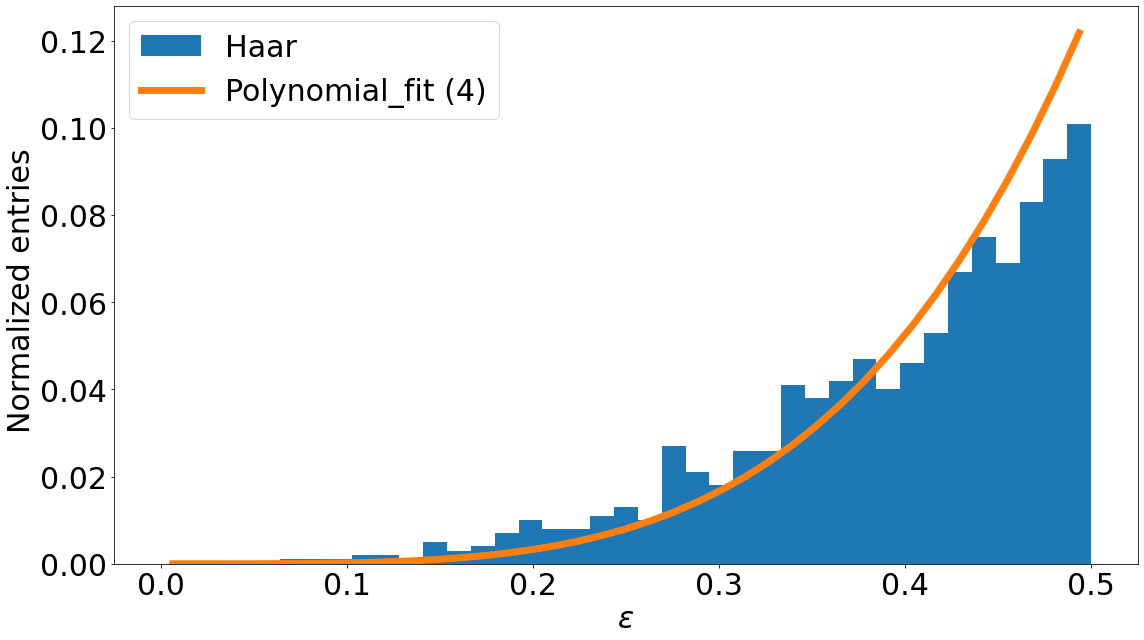

In [87]:
power=4

plt.figure(1)
LabelSize=30
plt.figure(figsize=(16,9))
plt.hist(target_diff_haar_list,label="Haar",bins=np.linspace(0,epsilon_max,40),weights=np.ones_like(target_diff_haar_list)/len(target_diff_haar_list)); 
y,x=np.histogram(target_diff_haar_list,bins=np.linspace(0,epsilon_max,40),weights=np.ones_like(target_diff_haar_list)/len(target_diff_haar_list))
x=(x[0:-1]+x[1:])/2
plt.plot(x,(1/(x**power).sum())*x**power,label="Polynomial_fit ({})".format(power),linewidth=7.0)
#plt.xscale('log')
plt.xlabel(r'$\epsilon$',fontsize=LabelSize)
plt.ylabel('Normalized entries ',fontsize=LabelSize)
plt.tick_params(axis='both', which='major', labelsize=LabelSize)
plt.legend(fontsize=LabelSize)
plt.tight_layout()
plt.show()

In [76]:
# epsilon_power should be the polynomial power + 1
n_matrices = 10000
epsilon_power = 5

rng = np.random.default_rng()

In [82]:
unitarity_diff_list=[]
target_diff_list=[]
U_prime_list=[]

for i in range(n_matrices):
#     M=np.random.rand(N,N)+1j*np.random.rand(N,N)
#     M=M/np.linalg.norm(M)
#     epsilon = epsilon_max * rng.power(epsilon_power ) 
    
    M=qi.random_unitary(N).to_matrix()
    epsilon = (epsilon_max+0.05) * rng.power(epsilon_power) 
    
    A=(M+np.transpose(M.conjugate()))
    A=A/np.linalg.norm(A)
    U_exp=expm(1j*epsilon*A)
    U_prime=U@U_exp
    
    norm_ratio=np.linalg.norm(U)/np.linalg.norm(U_prime)
    U_prime = U_prime*norm_ratio
    
    if target_diff(U_prime,U)>epsilon_max:
        continue
    
    U_prime_list.append(U_prime)
    unitarity_diff_list.append(unitarity_diff(U_prime))
    target_diff_list.append(target_diff(U_prime,U))
    
    
   
U_prime_list=np.array(U_prime_list)
unitarity_diff_list=np.array(unitarity_diff_list)  
target_diff_list=np.array(target_diff_list)

In [83]:
fid_prime=mkFid(U_prime_list,1000,ind=[0,0])
fid_haar=mkFid(Haar_list,len(Haar_list),ind=[0,0])



<Figure size 432x288 with 0 Axes>

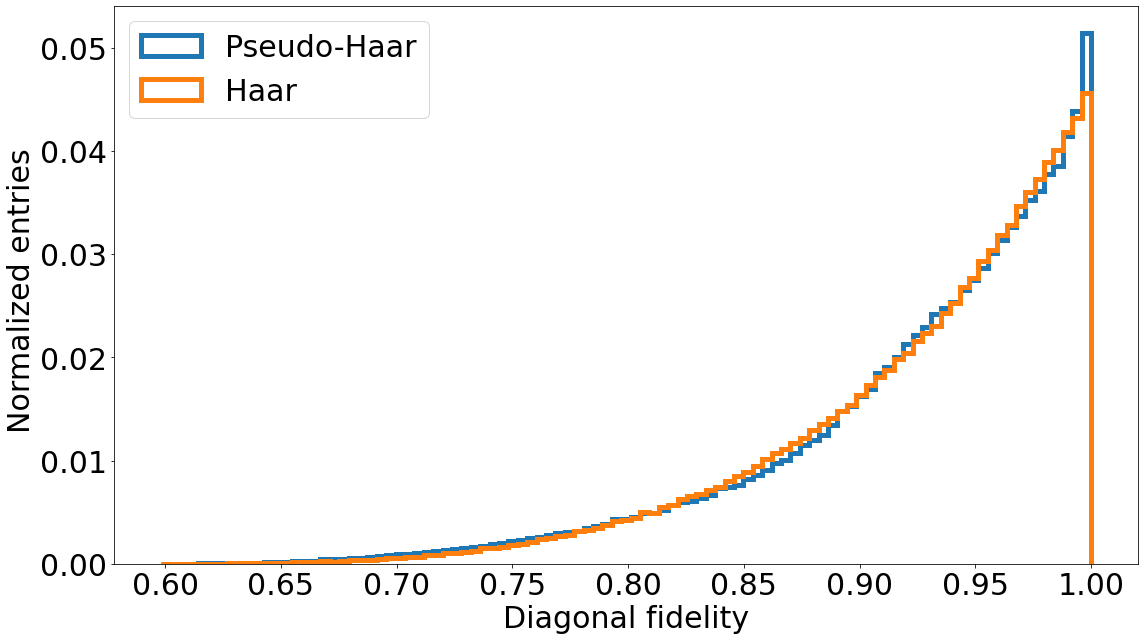

In [84]:
LabelSize=30
plt.figure(1)
plt.figure(figsize=(16,9))

nBins=100
bin_min=min(fid_prime.min(),fid_haar.min())
bin_max=max(fid_prime.max(),fid_haar.max())
plt.hist(fid_prime,linewidth=5.0,weights=np.ones_like(fid_prime)/len(fid_prime),bins=np.linspace(bin_min,bin_max,nBins),histtype='step',label='Pseudo-Haar');
plt.hist(fid_haar,linewidth=5.0,weights=np.ones_like(fid_haar)/len(fid_haar),bins=np.linspace(bin_min,bin_max,nBins),histtype='step',label='Haar');
plt.xlabel('Diagonal fidelity',fontsize=LabelSize)
plt.ylabel('Normalized entries ',fontsize=LabelSize)
plt.tick_params(axis='both', which='major', labelsize=LabelSize)
plt.legend(fontsize=LabelSize)
plt.tight_layout()
plt.show()


<Figure size 432x288 with 0 Axes>

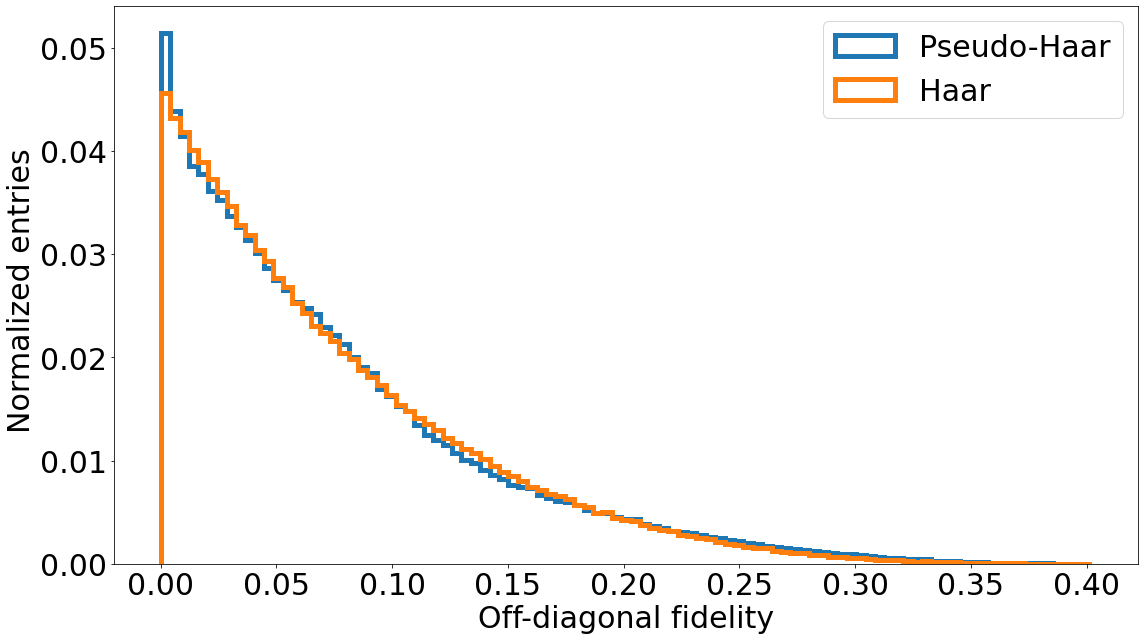

In [85]:
fid_prime=mkFid(U_prime_list,1000,ind=[1,0])
fid_haar=mkFid(Haar_list,len(Haar_list),ind=[1,0])

LabelSize=30
plt.figure(1)
plt.figure(figsize=(16,9))

nBins=100
bin_min=min(fid_prime.min(),fid_haar.min())
bin_max=max(fid_prime.max(),fid_haar.max())
plt.hist(fid_prime,linewidth=5.0,weights=np.ones_like(fid_prime)/len(fid_prime),bins=np.linspace(bin_min,bin_max,nBins),histtype='step',label='Pseudo-Haar');
plt.hist(fid_haar,linewidth=5.0,weights=np.ones_like(fid_haar)/len(fid_haar),bins=np.linspace(bin_min,bin_max,nBins),histtype='step',label='Haar');
plt.xlabel('Off-diagonal fidelity',fontsize=LabelSize)
plt.ylabel('Normalized entries ',fontsize=LabelSize)
plt.tick_params(axis='both', which='major', labelsize=LabelSize)
plt.legend(fontsize=LabelSize)
plt.tight_layout()
plt.show()




<Figure size 432x288 with 0 Axes>

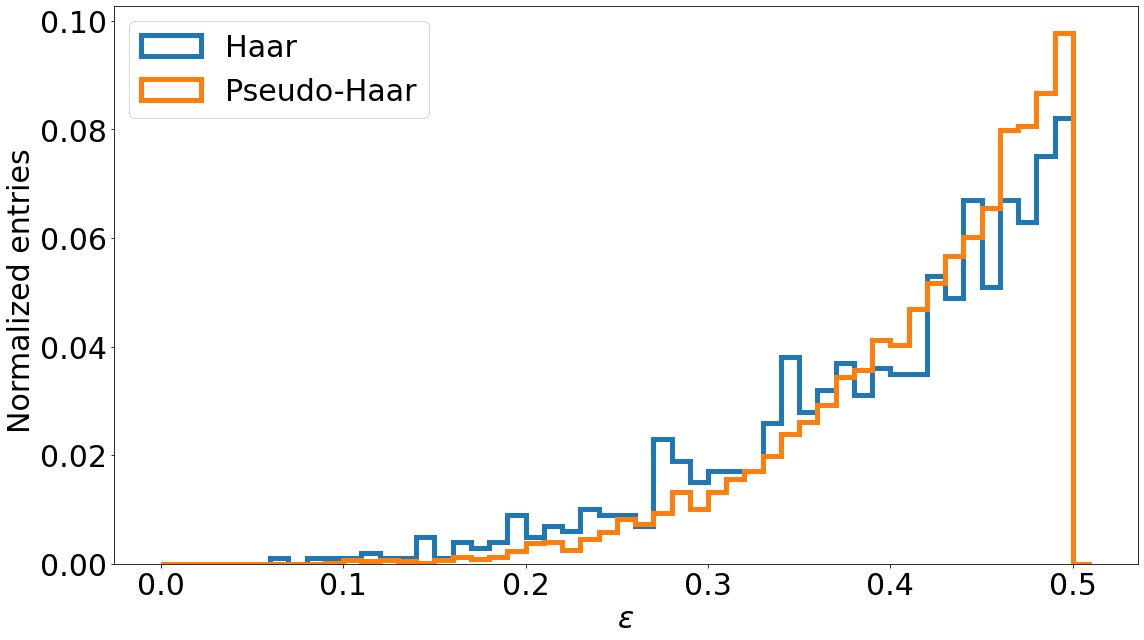

In [86]:

LabelSize=30
plt.figure(1)
plt.figure(figsize=(16,9))

bin_min=min(fid_prime.min(),fid_haar.min())
bin_max=max(fid_prime.max(),fid_haar.max())
plt.hist(target_diff_haar_list,linewidth=5.0,label='Haar',bins=np.arange(0,epsilon_max+0.02,0.01),weights=np.ones_like(target_diff_haar_list)/len(target_diff_haar_list),histtype='step'); 
plt.hist(target_diff_list,linewidth=5.0,label='Pseudo-Haar',bins=np.arange(0,epsilon_max+0.02,0.01),weights=np.ones_like(target_diff_list)/len(target_diff_list),histtype='step');
plt.xlabel(r'$\epsilon$',fontsize=LabelSize)
plt.ylabel('Normalized entries ',fontsize=LabelSize)
plt.tick_params(axis='both', which='major', labelsize=LabelSize)
plt.legend(fontsize=LabelSize)
plt.tight_layout()
plt.show()
